Cristina Cicali, Clelia Corridori, Anna Steffinlongo
# Lyapunov Exponent and Out-of-Time-Ordered Correlator’s Growth Rate

In [1]:
#Call of all the libreries needed
from numpy import *
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random as rand
from OTOCfunc import *
from CGR_LYAPfunc import *

### Computation of the OTOC

In [2]:
#Parameters to compute the Out-Of-Time-Ordered-Correlator OTOC for different values of K
# N is the number for the space/momentum discretization
# T is the period of the kicks  
# K are the different values of the kicking strength. 
# Nkicks is the number of kicks.
# trials: number of trials over which we compute the mean of the fitted CGR
# trials_OTOC: number of trials over which we compute the OTOC
N=2**14
T=2**-7
trials_OTOC=10
trials=10
K=logspace(-2,2,50)
Nkicks=30
Kick=arange(1,Nkicks+1,1)

In [3]:
# Check the correct type of each parameter and its sign if needed.
# N
if (issubclass(type(N),int)):
    ()
else:
    print("Wrong type!")
    print("N is", type(N), ", it must be int!")
    sys.exit()
if (N<0):
    print("N must be greater than 0!")
    sys.exit()

# T
if (issubclass(type(T),int) or issubclass(type(T),float)):
    ()
else:
    print("Wrong type!")
    print("T is", type(T), ", it must be float or int!")
    sys.exit()
if (T<0):
    print("T must be greater than 0!")
    sys.exit()

# K
for kk in K:
    if (issubclass(type(kk),int) or issubclass(type(kk),float)):
        ()
    else:
        print("Wrong type!")
        print("K is", type(kk), ", it must be float or int!")
    if (kk<0):
        print("K must be greater than 0!")
        sys.exit()

# Nkicks
if (issubclass(type(Nkicks),int)):
    ()
else:
    print("Wrong type!")
    print("Nkicks is", type(Nkicks), ", it must be int!")
    sys.exit()
if (Nkicks<0):
    print("Nkicks must be greater than 0!")
    sys.exit()

# trials
if (issubclass(type(trials),int)):
    ()
else:
    print("Wrong type!")
    print("Trials is", type(trials), ", it must be int!")
    sys.exit()
if (trials<0):
    print("Trials must be greater than 0!")
    sys.exit()
    
# trials_OTOC
if (issubclass(type(trials_OTOC),int)):
    ()
else:
    print("Wrong type!")
    print("trials_OTOC is", type(trials_OTOC), ", it must be int!")
    sys.exit()
if (trials_OTOC<0):
    print("trials_OTOC must be greater than 0!")
    sys.exit()

# NT relation check
if(N*T<2**7 or N*T>2**16):
    print("N*T out of range! Using T=2**-7 and N=2**14 instead.")
    N=2**14
    T=2**-7

In [ ]:
# mean of the OTOC
mean_C=zeros([Nkicks,len(K),trials])
for kk in range(trials):
    mean_C[:,:,kk]=mean_otoc(N,T,K,Nkicks,trials_OTOC,True)

In [3]:
#Due to the time needed for the computation of the OTOC we saved the data in a txt file in order to only load
#the file when needed
# Set saveF=True to save the file
saveF=False
if saveF==True:
    with open('OTOC_10trials_10Mean-EXP.txt', 'w') as out:
        for line in mean_C:
            savetxt(out, line)


In [2]:
# To load data from a txt file set load=True
load=True
if load==True:
    # The value selected here must be the same of the quantities above chosen for the saved file!
    N=2**14
    T=2**-7
    trials=10
    K=logspace(-2,2,50)
    Nkicks=30
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOC_10trials_10Mean-EXP.txt", comments="#", delimiter=" ", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(K),trials))

### Quantum CGR

In [3]:
#Computation of the correlator growth rate using the function quantumCGR_fit contained in the file CGR_LYAPfunc.py
CGR_Q=quantumCGR_fit(Kick, K, mean_C)


C:\Users\cleli\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


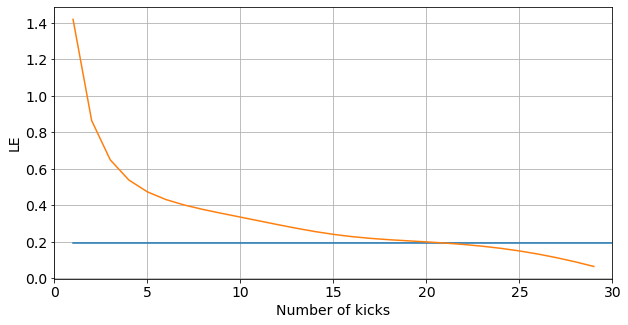

In [7]:
#Plot of an example of the method previous used. We plot the numerical value of the lyapunov exponent for 
#the value of K=0.045 as function of the number of kicks and also the linear fit.
k_sel=7
lyap_num=quantumCGR_num(mean_C[:,k_sel],Kick)

plt.figure(figsize=(10,5))
plt.plot(Kick,ones(len(Kick))*CGR_Q[k_sel]*2, label='Linear fit')
plt.plot(Kick[:-1],lyap_num,label='LE')
plt.legend(loc='upper right', fontsize='14')
plt.xlim([0,30])
plt.xlabel('Number of kicks', size=14)
plt.ylabel('LE', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
# plt.xlim([16,24])
# plt.ylim([0,0.4])
plt.grid()
plt.savefig('Q_CGR_K0045TOT.png', dpi=100)

### Classical LE numerically computed

In [8]:
#Computation of the classical Lyapunov exponent.

# P: steps (each one made of Nkicks) for the classical KR.
# x_i: initial position choosen between 0 and 2*pi from a uniform distribution
# p_i: initial momentum choosen between 0 and 2*pi from a uniform distribution
# dxi: initial displacement for the position
# dpi: initial displacement for the momentum
# Nkicks: number of kikcs
# K: kicking strength
# nd: mean square value of the displacement

P=1000
Nkicks=50 
trials=100
dxi=10**(-10)
dpi=10**(-10)
lyap_t=zeros([len(K),trials])
lyapCL=zeros(len(K))
for kk in range(0,len(K)):
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        nd = evoluz(P, x_i, p_i, dxi, dpi, Nkicks, K[kk])
        lyap_t[kk,ii] = lyapFunc(P,Nkicks,nd)
    lyapCL[kk]=sum(lyap_t[kk,:])/trials


### Classical CGR numerically computed

In [9]:
#Computation of the classical Correlator growth rate.

Nkicks=50
trials=1000
dxi=10**(-12)
dpi=10**(-12)

CGR_c=zeros(len(K))
for kk in range(0,len(K)):
    dp2=zeros([Nkicks,trials])
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        dp2[:,ii] = map_kr_CGR(x_i, p_i, dxi, dpi, Nkicks, K[kk])
    dp2mean=mean(dp2,1)
    
    dp2meanShift=insert(dp2mean, 0, 0)
    dp2meanShift=delete(dp2meanShift, -1)

    ratio= log(dp2mean[2:]/dp2meanShift[2:])
    
    CGR_c[kk]=(1/(2*(Nkicks-1)))*sum(ratio)


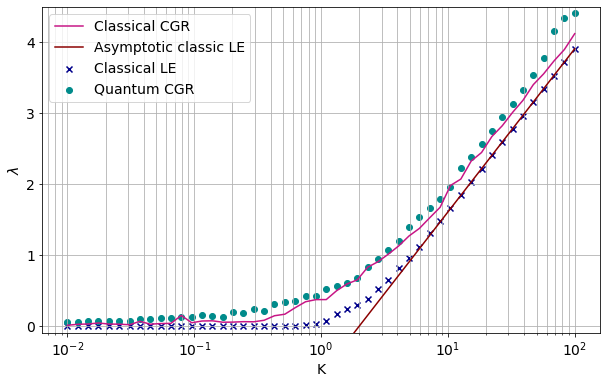

In [10]:
plt.figure(figsize=(10,6))
plt.xscale('log')

# Classical LE
plt.scatter(K,lyapCL,marker='x',label='Classical LE', color='darkblue')

# Classical CGR
plt.plot(K, CGR_c, label='Classical CGR',color='mediumvioletred')

# Classical LE analytical behaviour for large K
plt.plot(K,log(K/2), label='Asymptotic classic LE', color='darkred')

# Quantum CGR
plt.scatter(K[:],CGR_Q[:], label='Quantum CGR', color='darkcyan')

plt.legend(fontsize=14)
plt.ylim([-0.1,4.5])
plt.xlabel('K', size=14)
plt.ylabel('$\lambda$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(True, which="both")
plt.savefig('CGRandLE.png', dpi=100)

No handles with labels found to put in legend.


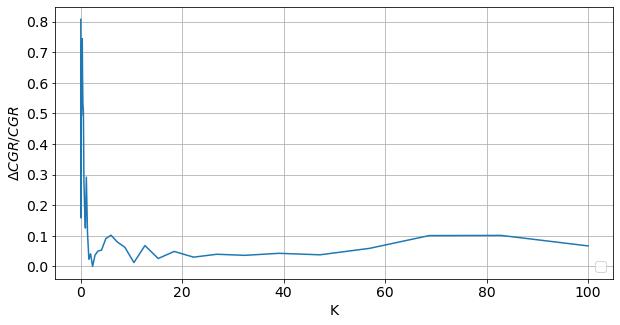

In [11]:
# Differences between the CGR for the classical Kicked rotator and the quantum CGR, divided by the quantum CGR
differencesCGR=abs(CGR_Q-CGR_c)/CGR_Q

plt.figure(figsize=(10,5))
# plt.yscale('log')
plt.plot(K,differencesCGR)

plt.legend(loc='lower right', fontsize='14')
plt.xlabel('K', size=14)
plt.ylabel('$\Delta CGR/CGR$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.grid(True, which="both")
plt.savefig('diff_CGR.png', dpi=100)

No handles with labels found to put in legend.


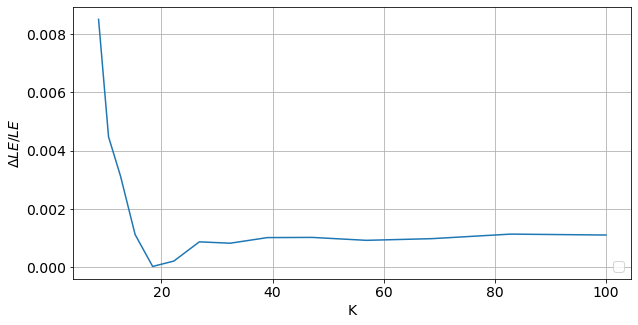

In [12]:
# Differences between the numerically computed LE for the CKR and the analitycal behaviour, divided by the analytical behaviour
differencesLE=abs(log(K/2)-lyapCL)/log(K/2)

plt.figure(figsize=(10,5))
# plt.yscale('log')
plt.plot(K[36:],differencesLE[36:])

plt.legend(loc='lower right', fontsize='14')
plt.xlabel('K', size=14)
plt.ylabel('$\Delta LE/LE$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(True, which="both")
plt.savefig('diff_LE_Classical.png', dpi=100)

No handles with labels found to put in legend.


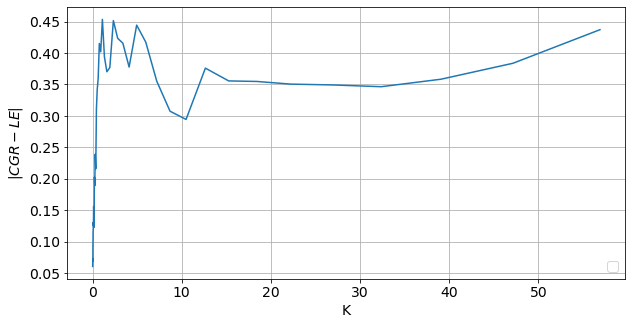

In [13]:
# Differences between the numerically computed LE for the CKR and the CGR for the QKR
differencesLE=abs(CGR_Q-lyapCL)

plt.figure(figsize=(10,5))
plt.plot(K[:-3],differencesLE[:-3])

plt.legend(loc='lower right', fontsize='14')
plt.xlabel('K', size=14)
plt.ylabel('$|CGR-LE|$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(True, which="both")
plt.savefig('diff_LE-CGR_Classical.png', dpi=100)